here we pull the outputs saved by `run.py` and analyze them.

In [1]:
import os
import numpy as np
import yaml
import pickle
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')

/lscratch/humna/ipykernel_3143473/115119132.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### load in config

In [3]:
config_path = '../scripts/config.yml'
config = yaml.safe_load(open(config_path, 'r'))

outdir = config['outdir']
basepath = config['basepath']
tag_to_look_for = config['tag_to_look_for']

timepts = config['timepts']
time_points = np.arange(timepts[0], timepts[1], timepts[2])
del timepts

### lets first see whats sims there are

In [4]:
for cat in ['baseline', 'weather']:
    dbpath = f'{basepath}/{cat}'
    print([f for f in os.listdir(dbpath) if f.endswith(tag_to_look_for)])

['baseline_v4.3.1_10yrs.db']
['weather_cloudso18v4.3.1_10yrs.db', 'weather_cloudso10v4.3.1_10yrs.db', 'weather_cloudso2v4.3.1_10yrs.db', 'weather_cloudso30v4.3.1_10yrs.db', 'weather_cloudso12v4.3.1_10yrs.db', 'weather_cloudso6v4.3.1_10yrs.db', 'weather_cloudso35v4.3.1_10yrs.db', 'weather_cloudso1v4.3.1_10yrs.db', 'weather_cloudso0v4.3.1_10yrs.db', 'weather_cloudso4v4.3.1_10yrs.db', 'weather_cloudso16v4.3.1_10yrs.db', 'weather_cloudso31v4.3.1_10yrs.db', 'weather_cloudso20v4.3.1_10yrs.db', 'weather_cloudso36v4.3.1_10yrs.db']


lets add some tags for helpful idenitification of the various sims

### read in the metrics data

In [5]:
fnovs_base = f'{outdir}/fnovs_vector_base.pickle'

out = pickle.load(open(fnovs_base, 'rb'))
fnovs_time_all, fnovs_time_per_filter = out['fnovs_time_all'], out['fnovs_time_per_filter']

## plot

In [6]:
baseline_tag = None
clouds_tag = {}
ints = []
for db in fnovs_time_all:
    if db.__contains__('baseline'):
        baseline_tag = db
    else:
        clouds_tag[db] = int(db.split('cloudso')[-1].split('v')[0])

clouds_tag = {k: v for k, v in sorted(clouds_tag.items(), key=lambda item: item[1], reverse=False)}

<Figure size 640x480 with 0 Axes>

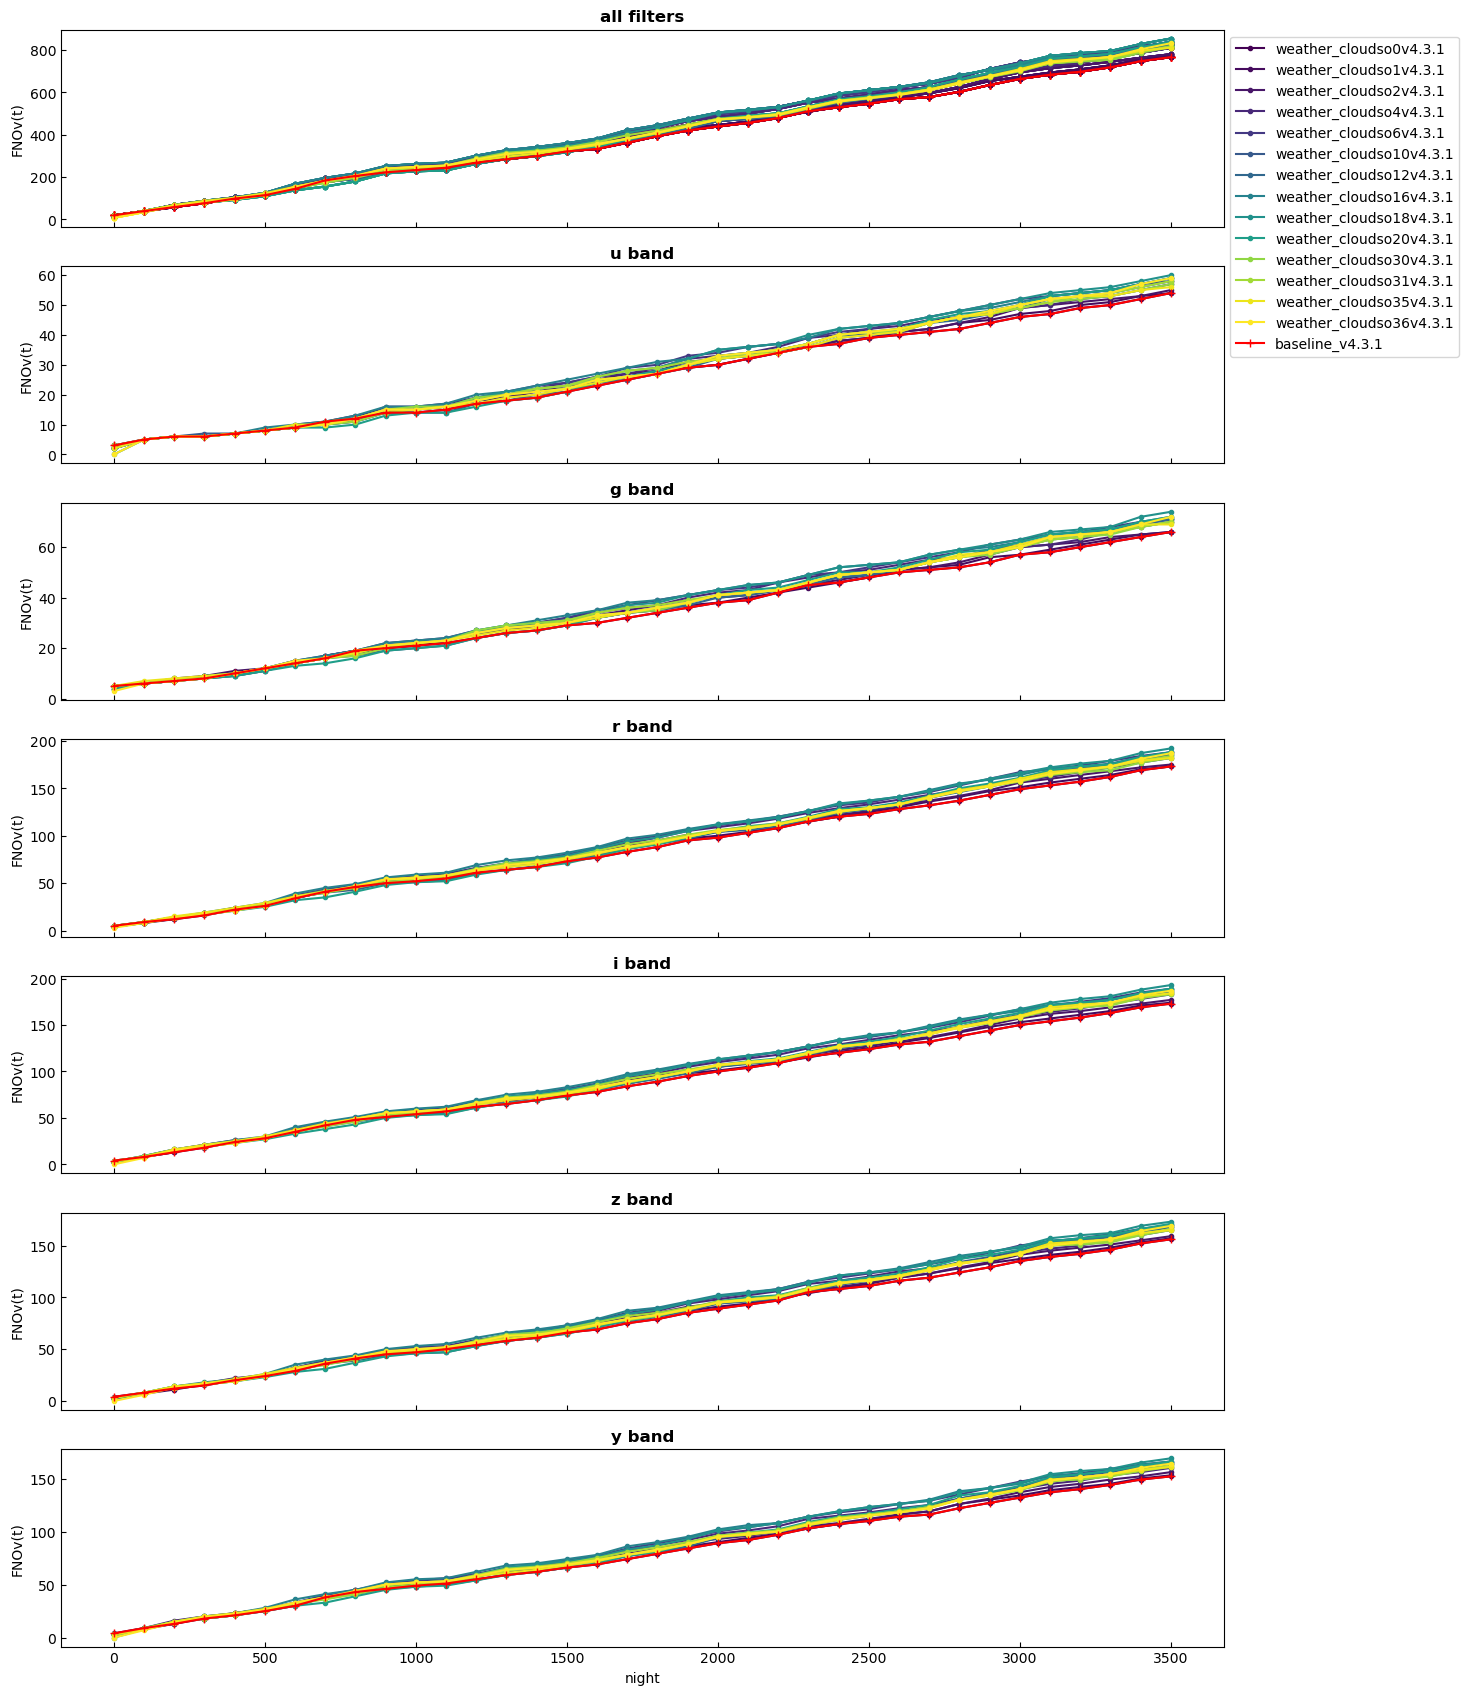

In [7]:
nrows, ncols = 7, 1

plt.clf()
fig, axes = plt.subplots(nrows, ncols)

for i, filt in enumerate(fnovs_time_per_filter):
    for j, db in enumerate(list(clouds_tag.keys()) + [baseline_tag]):
        if db.__contains__('baseline'):
            color = 'r'
            sym = '+'
        else:
            sym = '.'
            color = cmap( (clouds_tag[db] - min(clouds_tag.values())) / (max(clouds_tag.values()) - min(clouds_tag.values())) )
        axes[0].plot(time_points[:-1], fnovs_time_all[db], sym+'-', label=db if i == 0 else None, color=color)
        axes[i+1].plot(time_points[:-1], fnovs_time_per_filter[filt][db], sym+'-', color=color)

        if j == 0:
            axes[0].set_title('all filters', fontweight='bold')
            axes[i+1].set_title(f'{filt} band', fontweight='bold')
            
for k in range(nrows):
    axes[k].tick_params(axis="both", direction="in")
    axes[k].set_ylabel('FNOv(t)')
for k in range(nrows-1):
    axes[k].set_xticklabels([])

axes[0].legend(bbox_to_anchor=(1,1))
axes[-1].set_xlabel('night')

fig.set_size_inches(15, nrows*3)
plt.show()

ok not the most helpful plot .. lets plot the differences from baseline.

<Figure size 640x480 with 0 Axes>

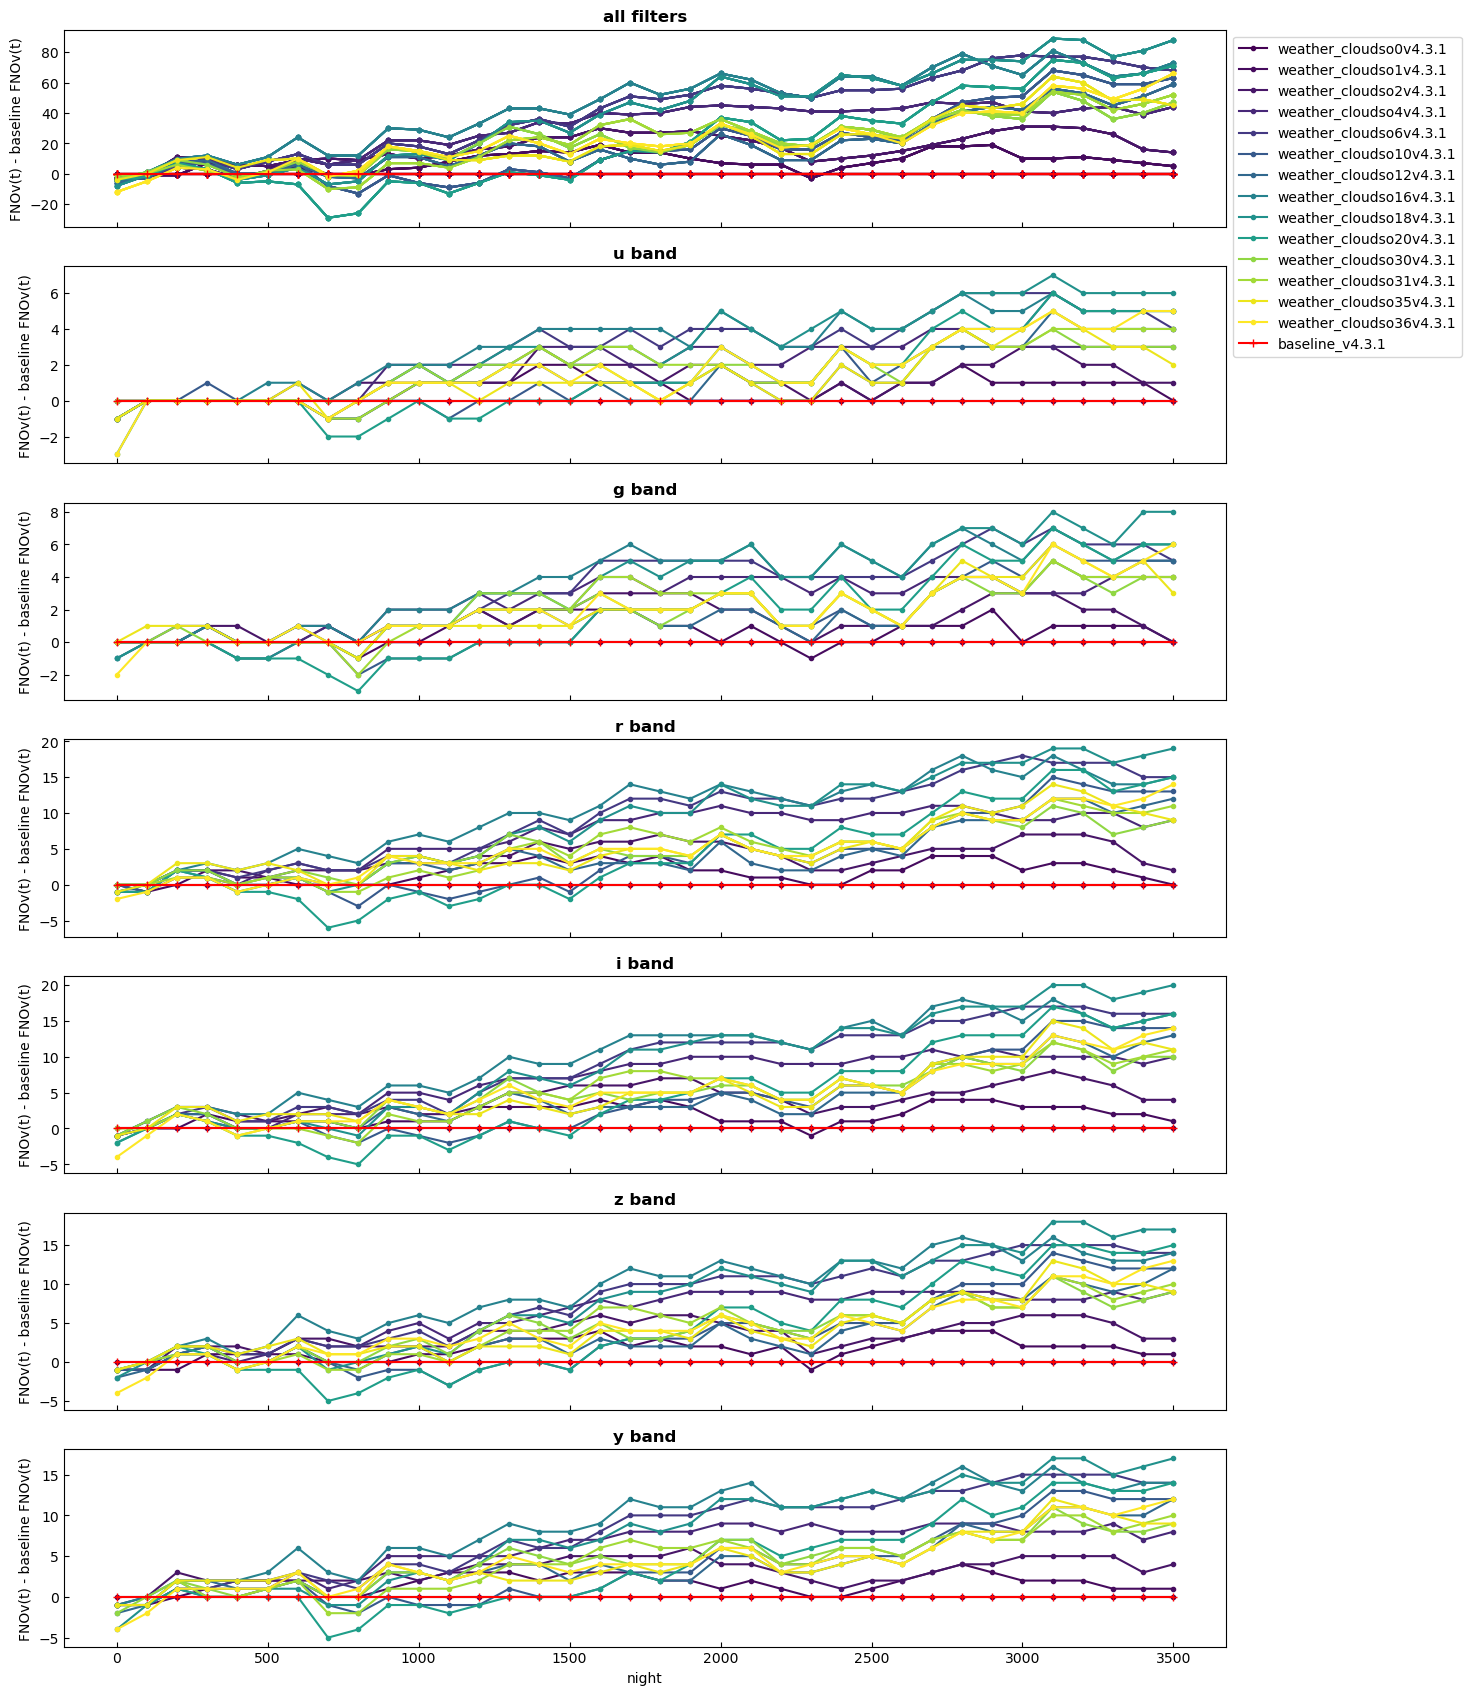

In [8]:
nrows, ncols = 7, 1

plt.clf()
fig, axes = plt.subplots(nrows, ncols)

for i, filt in enumerate(fnovs_time_per_filter):
    for j, db in enumerate(list(clouds_tag.keys()) + [baseline_tag]):
        if db.__contains__('baseline'):
            color = 'r'
            sym = '+'
        else:
            color = cmap( (clouds_tag[db] - min(clouds_tag.values())) / (max(clouds_tag.values()) - min(clouds_tag.values())) )
            sym = '.'
        
        axes[0].plot(time_points[:-1], fnovs_time_all[db] - fnovs_time_all[baseline_tag], sym+'-', label=db if i == 0 else None, color=color)
        axes[i+1].plot(time_points[:-1], fnovs_time_per_filter[filt][db] - fnovs_time_per_filter[filt][baseline_tag], sym+'-', color=color)

        if j == 0:
            axes[0].set_title('all filters', fontweight='bold')
            axes[i+1].set_title(f'{filt} band', fontweight='bold')
            
for k in range(nrows):
    axes[k].tick_params(axis="both", direction="in")
    axes[k].set_ylabel('FNOv(t) - baseline FNOv(t)')
for k in range(nrows-1):
    axes[k].set_xticklabels([])

axes[0].legend(bbox_to_anchor=(1,1))
axes[-1].set_xlabel('night')

fig.set_size_inches(15, nrows*3)
plt.show()

ok we see a modest variation. naviely one would think that cloud tag number increase would linearly correlate with the metric - but it doesnt. something to understand more and investigate.